In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This analysis focuses on the factors that could potentially result in heart disease. It will help us understand not just the responsible factors, but also the ways one could prevent or reduce the chances of a heart diease.

In the end, we will use rudimentary machine learning algorithms to determine the truth behind our analysis.

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import keras
import warnings
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical


import os
pyo.init_notebook_mode()
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/New folder/'): # Path of folder included "heart.csv" and "code" files. 
    for filename in filenames:
        print(os.path.join(dirname, filename))

Output hidden; open in https://colab.research.google.com to view.

### Importing Dataset

In [ ]:
data_filepath = '/content/drive/MyDrive/Colab Notebooks/New folder/dataset.csv'    # Path of "heart.csv" file. 
data = pd.read_csv(data_filepath)
data.shape #(rows, columns)

(303, 14)

### Data contains - 

* **age** - Age in Years
* **sex** - *(1 = male; 0 = female)*
* **cp** - Chest Pain Type
* **trestbps** - Resting Blood Pressure *(in mm Hg on admission to the hospital)*
* **chol** - Serum Cholestoral *(in mg/dl)*
* **fbs** - Fasting Blood Sugar > 120 mg/dl *(1 = true; 0 = false)*
* **restecg** - Resting ElectroCardioGraphic *(ECG)* Results
* **thalach** - Maximum Heart Rate Achieved
* **exang** - Exercise Induced Angina *(1 = yes; 0 = no)*
* **oldpeak** - ST Depression Induced by Exercise Relative to Rest
* **slope** - The Slope of the Peak Exercise ST Segment
* **ca** - Number of Major Vessels (0-4) Colored by Flourosopy
* **thal** - *(3 = normal; 6 = fixed defect; 7 = reversible defect)*
* **target** - Have a Heart Disease or Not *(1 = yes, 0 = no)*

# Data exploration


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

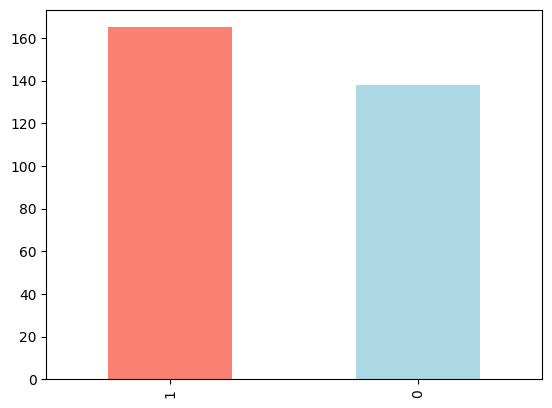

In [ ]:
data["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# check for missing values

data.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Unique Dataset Values

In [ ]:
print("Column Names -\n", data.columns.unique())
print("\nShape of the Dataset -\n", data.shape)
print("\n\nUnique Values -")
columns = data.columns
for i in columns:
    print(data[i].unique())

Column Names -
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Shape of the Dataset -
 (303, 14)


Unique Values -
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
[1 0]
[3 2 1 0]
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 

## Basic Data Analysis

### Heart disease frequency according to sex

In [ ]:
data.sex.value_counts()


1    207
0     96
Name: sex, dtype: int64

In [ ]:
# compare target column with sex column
pd.crosstab(data.target, data.sex)


sex,0,1
target,,
0,24,114
1,72,93


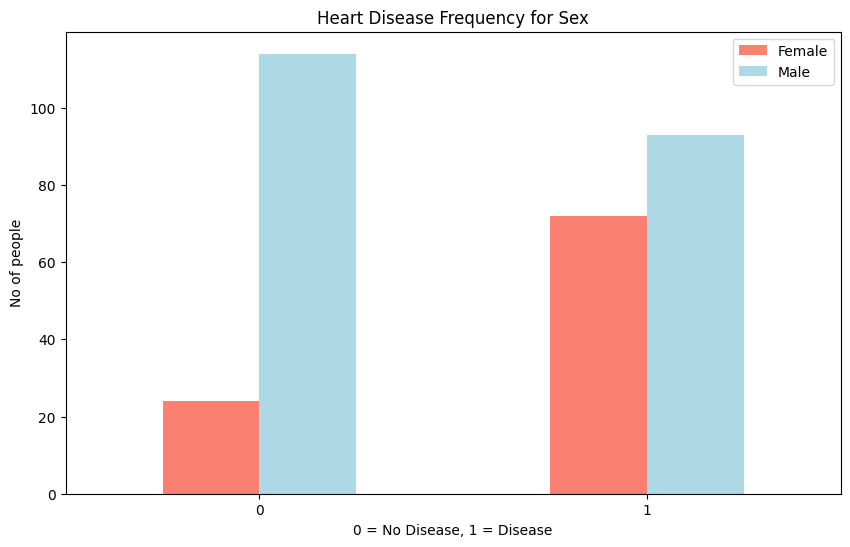

In [ ]:
pd.crosstab(data.target, data.sex).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("No of people")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Age vs Max heart rate for Heart Disease

In [ ]:
# create another figure

plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon");

# scatter with negative exaples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
# Check the distribution of the age column with a histogram
data.age.plot.hist();


# Heart disease frequency per chest pain type

```
cp- chest pain type

0: Typical angina
1: Atypical angina
2: Non-angnial pain
3: Asymptomatic
```



In [ ]:
pd.crosstab(data.cp,data.target)

In [ ]:
# Making it more visual

pd.crosstab(data.cp,data.target).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])

plt.title("Heart Disease in function of Chest Pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("No of people")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [ ]:
pd.crosstab(data.trestbps,data.target)

### Limit Based Comparison and Analysis.

This particular method will help us understand, on a surface level what limiting factors are responsible for the presence of Heart Disease.

#### Age vs Target

In [ ]:
age_data = data.copy()

age_grp = ['29-33', '34-38', '39-43', '44-48', '49-53', '54-58', '59-63', '64-68', '69-73', '74-78']
age_data['age_cat'] = pd.cut(age_data['age'], 10, labels=age_grp)

age_plt = pd.crosstab(age_data.age_cat, age_data.target)

fig, ax= plt.subplots()
age_plt.plot(kind="bar", figsize=(15,6), color=['#F4B41A', '#143D59'], ax=ax)
plt.title('Heart Disease Frequency')
plt.xlabel('Age Categories')
ax.set_xticklabels(age_grp)
plt.xticks(rotation = 45)
plt.legend(["Absence", "Presence"], title="Heart Disease", title_fontsize='large', fancybox=True, borderpad=0.9)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.ylabel('Disease Count')
plt.show()

#### Resting Blood Pressure vs Target

In [ ]:
bps_data = data.copy()

bps_grp = ['94-104', '105-115', '116-126', '127-137', '138-148', '149-159', '160-170', '171-181', '182-191', '192-200']
bps_data['bps_cat'] = pd.cut(bps_data['trestbps'], 10, labels=bps_grp)

bps_plt = pd.crosstab(bps_data.bps_cat, bps_data.target)

fig, ax= plt.subplots()
bps_plt.plot(kind="bar", figsize=(15,6), color=['#9BD3CB','#129A7D'], ax=ax)
plt.title('Heart Disease Frequency')
plt.xlabel('Resting Blood Pressure Categories')
ax.set_xticklabels(bps_grp)
plt.xticks(rotation = 45)
plt.legend(["Absence", "Presence"], title="Heart Disease", title_fontsize='large', fancybox=True, borderpad=0.9)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.ylabel('Disease Count')
plt.show()

#### Cholestrol Levels vs Target

In [ ]:
chol_data = data.copy()

chol_grp = ['125-213', '214-301', '302-388', '389-476', '477-564']
chol_data['chol_cat'] = pd.cut(chol_data['chol'], 5, labels=chol_grp)

chol_plt = pd.crosstab(chol_data.chol_cat, chol_data.target)

fig, ax= plt.subplots()
chol_plt.plot(kind="bar", figsize=(15,6), color=['#C9A4A0','#3B3638'], ax=ax)
plt.title('Heart Disease Frequency')
plt.xlabel('Cholestrol Level Categories')
ax.set_xticklabels(chol_grp)
plt.xticks(rotation = 45)
plt.legend(["Absence", "Presence"], title="Heart Disease", title_fontsize='large', fancybox=True, borderpad=0.9)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.ylabel('Disease Count')
plt.show()

#### Maximum Heart Rate vs Target

In [ ]:
thal_data = data.copy()

thal_grp = ['70-84', '84-96', '97-110', '111-122', '123-136', '137-149', '150-162', '163-175', '176-189', '190-202']
thal_data['thal_cat'] = pd.cut(thal_data['thalach'], 10, labels=thal_grp)

thal_plt = pd.crosstab(thal_data.thal_cat, thal_data.target)

fig, ax= plt.subplots()
thal_plt.plot(kind="bar", figsize=(15,6), color=['#BEC7D0','#536166'], ax=ax)
plt.title('Heart Disease Frequency')
plt.xlabel('Highest Heart Rate Categories')
ax.set_xticklabels(thal_grp)
plt.xticks(rotation = 45)
plt.legend(["Absence", "Presence"], title="Heart Disease", title_fontsize='large', fancybox=True, borderpad=0.9)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.ylabel('Disease Count')
plt.show()

#### Exercise Induced ST Plot Depressions vs Target

In [ ]:
old_data = data.copy()

old_grp = ['0.00-1.24', '1.25-2.48', '2.49-3.72', '3.73-4.96', '4.96-6.20']
old_data['old_cat'] = pd.cut(old_data['oldpeak'], 5, labels=old_grp)

old_plt = pd.crosstab(old_data.old_cat, old_data.target)

fig, ax= plt.subplots()
old_plt.plot(kind="bar", figsize=(15,6), color=['#E5DB9C','#E6A57E'], ax=ax)
plt.title('Heart Disease Frequency')
plt.xlabel('Plot Depression Categories')
ax.set_xticklabels(old_grp)
plt.xticks(rotation = 45)
plt.legend(["Absence", "Presence"], title="Heart Disease", title_fontsize='large', fancybox=True, borderpad=0.9)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.ylabel('Disease Count')
plt.show()

##### Now that we have compared limit based factors responsible for heart disease, we can look to value based factors. 

Value based factors look at individual numbers. They could be 1s and 0s, that signify a particular value. We will use these values and compare them against chances of contracting a heart disease to see which factors are relevant to our analysis.

### Value Based Comparison and Analysis

This particular method will help us understand, on a surface level what limiting factors are responsible for the presence of Heart Disease.

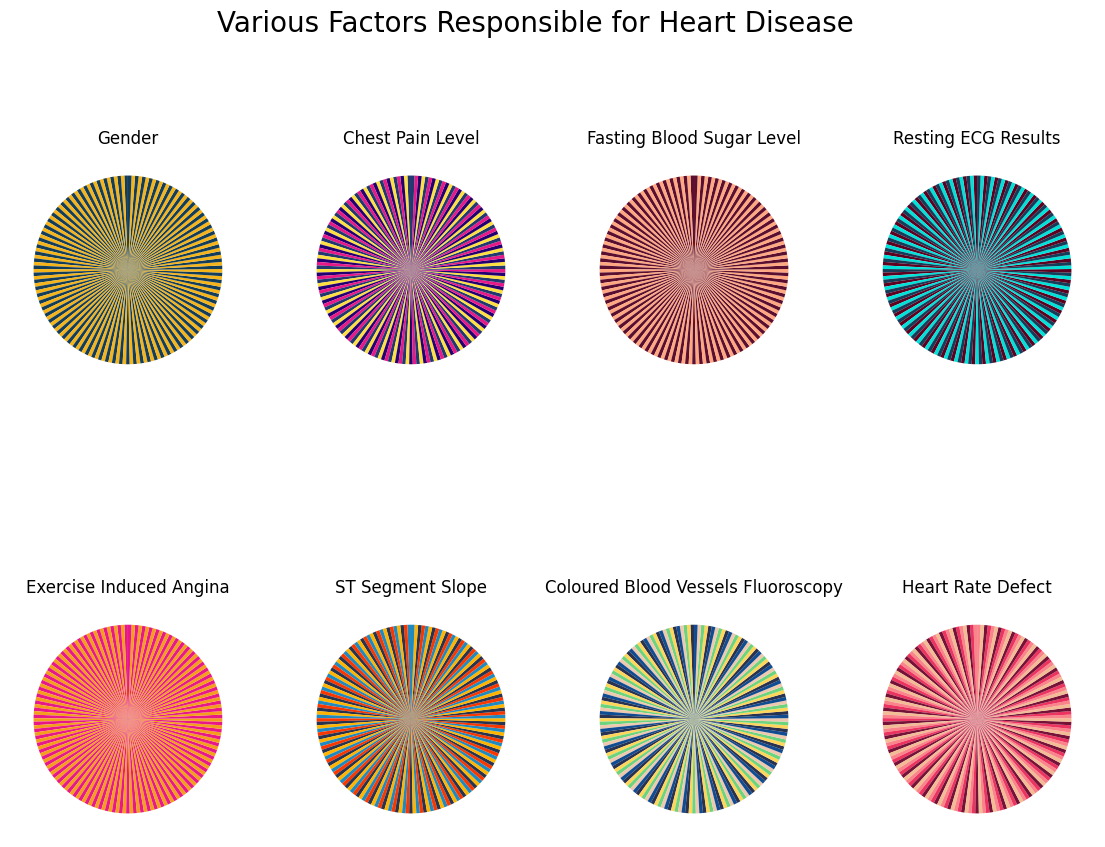

In [ ]:
sex_data = data.loc[data['target'] == 1, ['sex', 'target']]
sex_data.loc[sex_data['sex'] == 0, 'sex'] = 'Female'
sex_data.loc[sex_data['sex'] == 1, 'sex'] = 'Male'

cp_data = data.loc[data['target'] == 1, ['cp', 'target']]
cp_data.loc[cp_data['cp'] == 0, 'cp'] = 'Asymptomatic'
cp_data.loc[cp_data['cp'] == 1, 'cp'] = 'Typical Angina'
cp_data.loc[cp_data['cp'] == 2, 'cp'] = 'Atypical Angina'
cp_data.loc[cp_data['cp'] == 3, 'cp'] = 'Non-Anginal Pain'
cp_data.loc[cp_data['cp'] == 4, 'cp'] = 'Asymptomatic'

fbs_data = data.loc[data['target'] == 1, ['fbs', 'target']]
fbs_data.loc[fbs_data['fbs'] == 0, 'fbs'] = 'Lower Than 120mg/ml'
fbs_data.loc[fbs_data['fbs'] == 1, 'fbs'] = 'Higher Than 120mg/ml'

rest_data = data.loc[data['target'] == 1, ['restecg', 'target']]
rest_data.loc[rest_data['restecg'] == 0, 'restecg'] = 'Normal'
rest_data.loc[rest_data['restecg'] == 1, 'restecg'] = 'ST-T Wave Abnormality'
rest_data.loc[rest_data['restecg'] == 2, 'restecg'] = 'Left Ventricular Hypertrophy'

exa_data = data.loc[data['target'] == 1, ['exang', 'target']]
exa_data.loc[exa_data['exang'] == 0, 'exang'] = 'No'
exa_data.loc[exa_data['exang'] == 1, 'exang'] = 'Yes'

slo_data = data.loc[data['target'] == 1, ['slope', 'target']]
slo_data.loc[slo_data['slope'] == 0, 'slope'] = 'Unmeasured'
slo_data.loc[slo_data['slope'] == 1, 'slope'] = 'Upsloping'
slo_data.loc[slo_data['slope'] == 2, 'slope'] = 'Flat'
slo_data.loc[slo_data['slope'] == 3, 'slope'] = 'Downsloping'

ca_data = data.loc[data['target'] == 1, ['ca', 'target']]
ca_data.loc[ca_data['ca'] == 0, 'ca'] = 'No Vessels'
ca_data.loc[ca_data['ca'] == 1, 'ca'] = '1 Vessel'
ca_data.loc[ca_data['ca'] == 2, 'ca'] = '2 Vessels'
ca_data.loc[ca_data['ca'] == 3, 'ca'] = '3 Vessels'
ca_data.loc[ca_data['ca'] == 4, 'ca'] = '4 Vessels'

thal_data = data.loc[data['target'] == 1, ['thal', 'target']]
thal_data.loc[thal_data['thal'] == 0, 'thal'] = 'Undetected'
thal_data.loc[thal_data['thal'] == 1, 'thal'] = 'Normal'
thal_data.loc[thal_data['thal'] == 2, 'thal'] = 'Fixed Defect'
thal_data.loc[thal_data['thal'] == 3, 'thal'] = 'Reversible Defect'

sex_colors = ['#143D59','#F4B41A']
cp_colors = ['#213970', '#FFE042','#210070', '#E71989']
fbs_colors = ['#5B0E2D','#FFA781']
rest_colors = ['#5E001F','#00E1D9', '#143D59']
exa_colors = ['#E71989','#F49F1C']
slo_colors = ['#1F8AC0','#F93800', '#283350', '#FFB500']
ca_colors = ['#293250','#FFD55A', '#6DD47E', '#EFC9AF', '#104C91']
thal_colors = ['#F9858B','#ED335F', '#761137', '#F2BC94']

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4)

# Gender
ax[0, 0].pie(sex_data.target, startangle=90, colors=sex_colors)
ax[0, 0].set_title('Gender')

# Chest Pain Level
ax[0, 1].pie(cp_data.target, startangle=90, colors=cp_colors)
ax[0, 1].set_title('Chest Pain Level')

# Fasting Blood Sugar Level
ax[0, 2].pie(fbs_data.target, startangle=90, colors=fbs_colors)
ax[0, 2].set_title('Fasting Blood Sugar Level')

# Resting ECG Results
ax[0, 3].pie(rest_data.target,startangle=90, colors=rest_colors)
ax[0, 3].set_title('Resting ECG Results')

# Exercise Induced Angina
ax[1, 0].pie(exa_data.target, startangle=90, colors=exa_colors)
ax[1, 0].set_title('Exercise Induced Angina')

# ST Segment Slope
ax[1, 1].pie(slo_data.target, startangle=90, colors=slo_colors)
ax[1, 1].set_title('ST Segment Slope')

# Coloured Blood Vessels Fluoroscopy
ax[1, 2].pie(ca_data.target, startangle=90, colors=ca_colors)
ax[1, 2].set_title('Coloured Blood Vessels Fluoroscopy')

# Heart Rate Defect
ax[1, 3].pie(thal_data.target, startangle=90, colors=thal_colors)
ax[1, 3].set_title('Heart Rate Defect')

fig.suptitle('Various Factors Responsible for Heart Disease', fontsize=20)

plt.show()


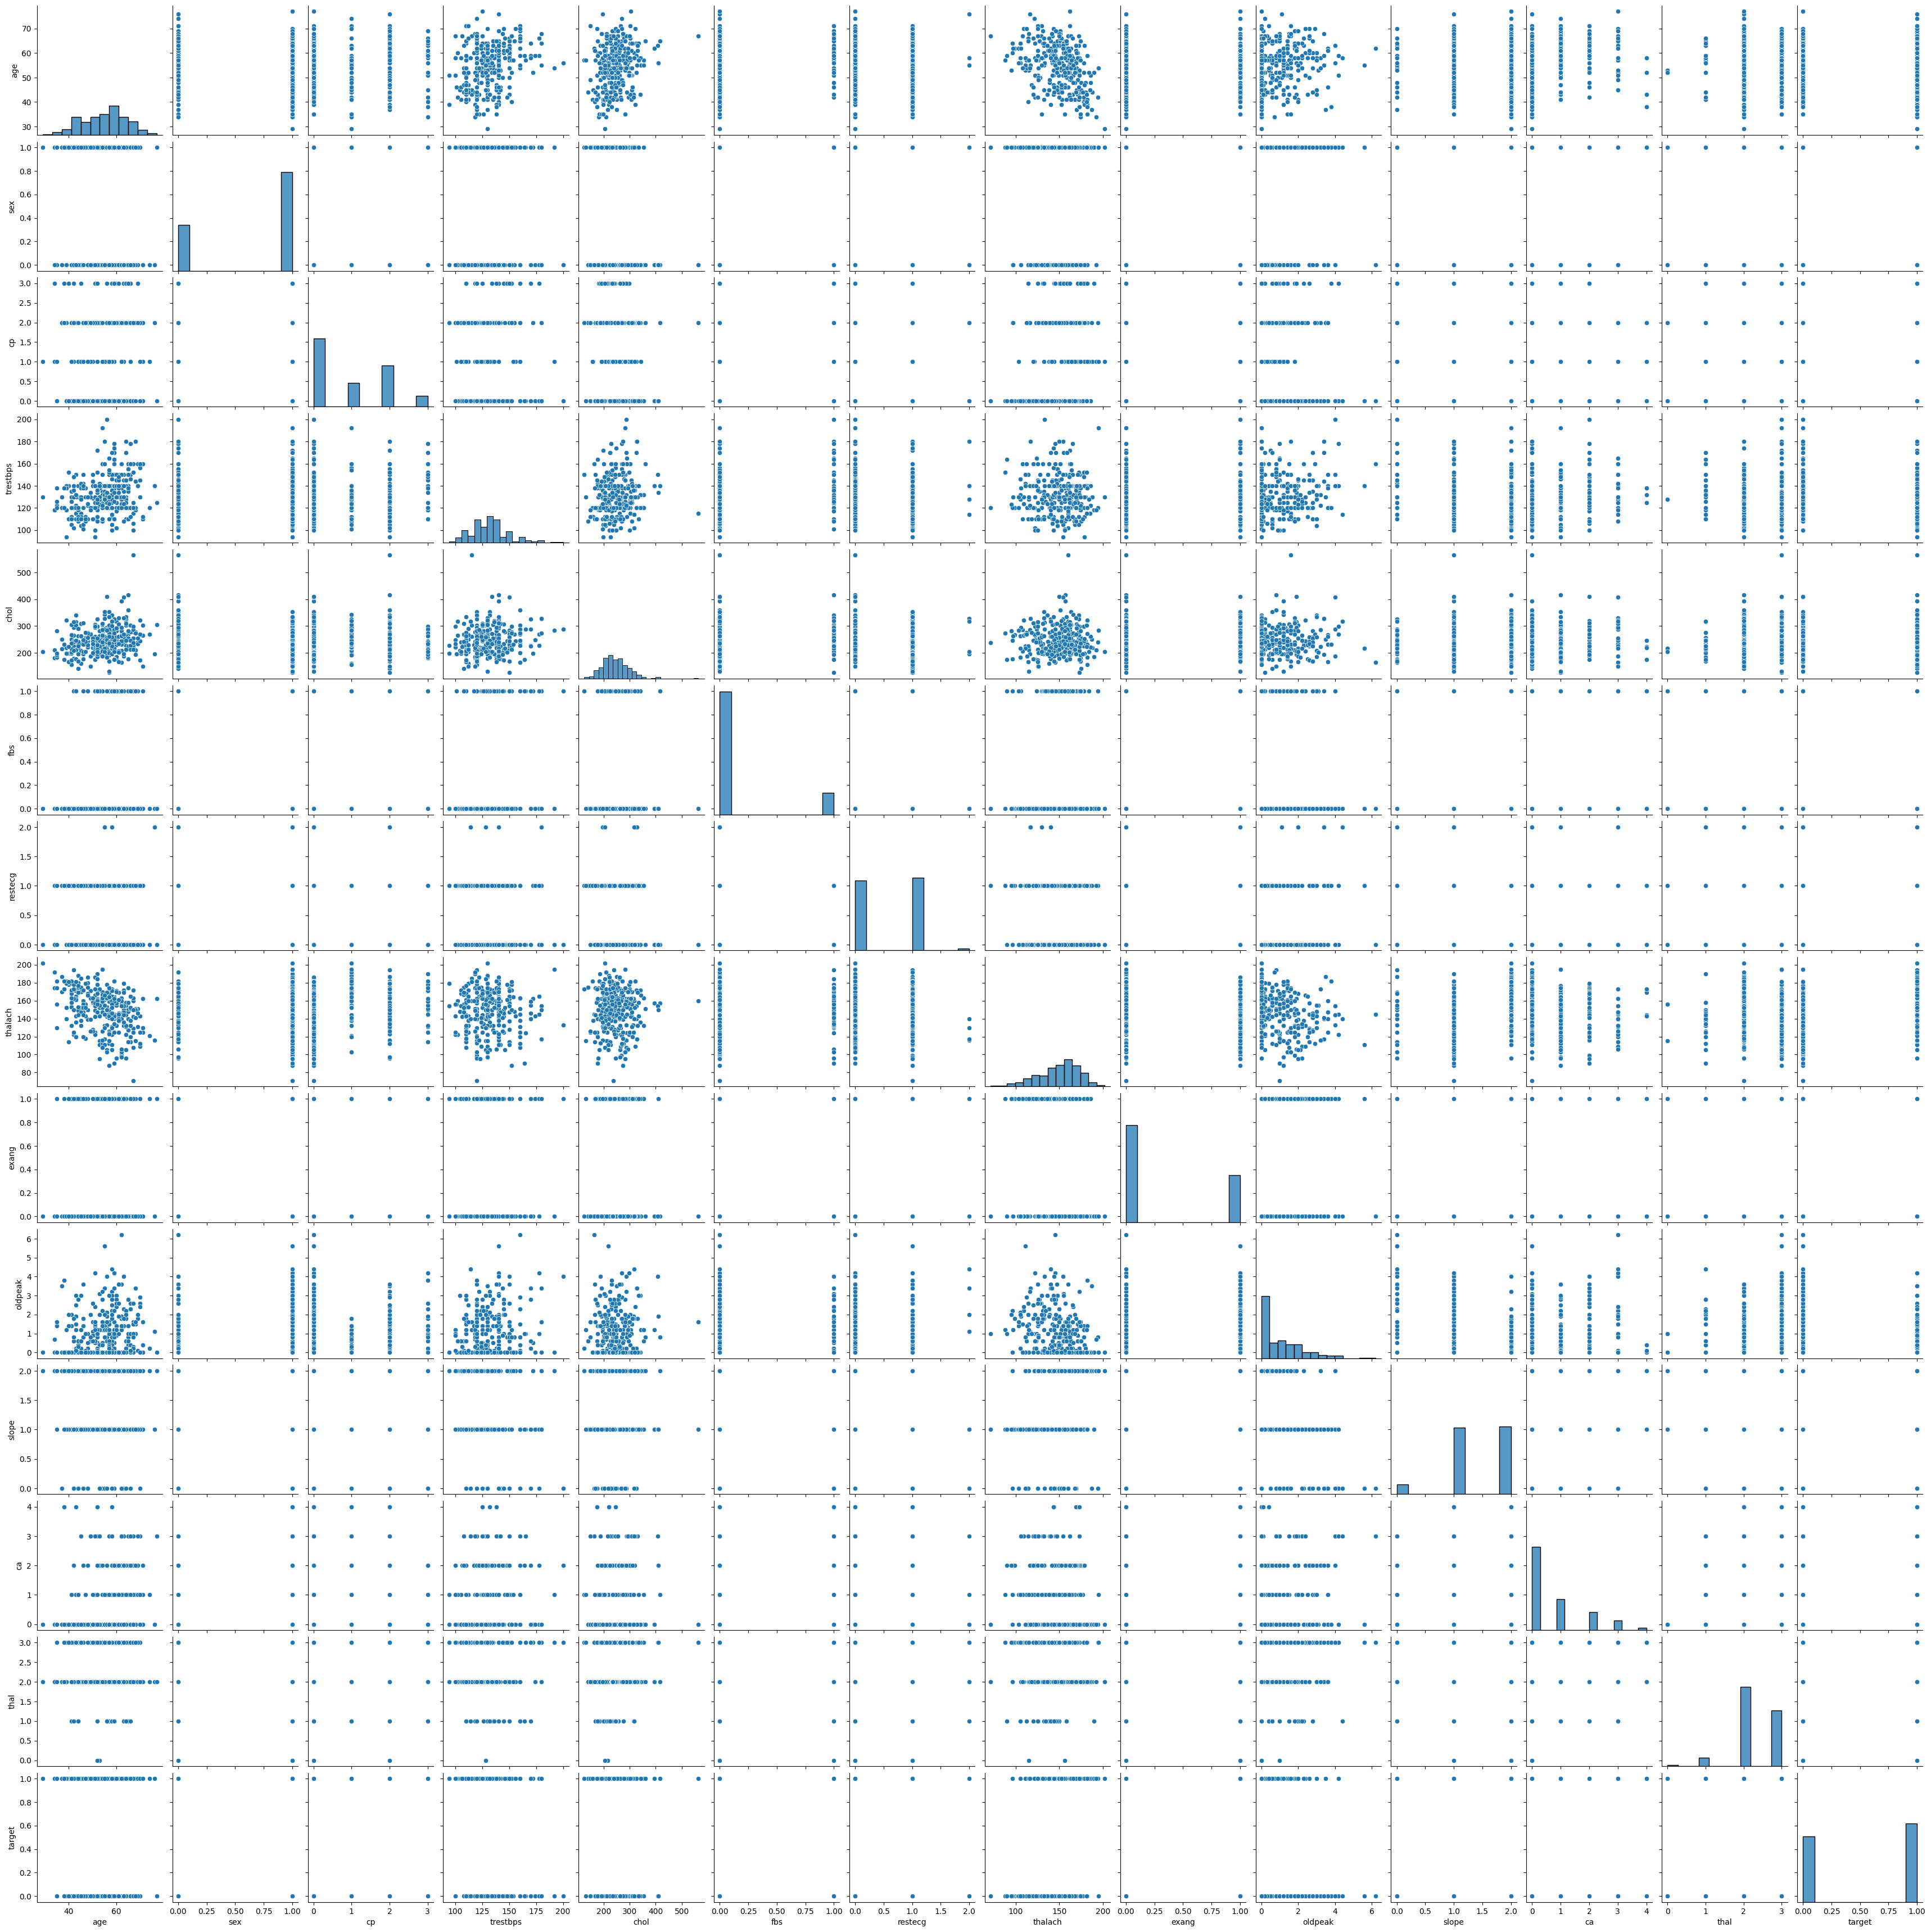

In [ ]:
sns.pairplot(data)
plt.show()

##### Now that we have our rudimentary analysis completed, we can complete a surface level report. 

* **Age** - Patients within the ages of 39 and 68 are at a higher risk than others. But at the same time, they have a lower percentage of cases with respect to the total admissions. 
* **Sex** - Male patients are at a significantly higher risk than female patients when it comes to the contraction of heart disease
* **Chest Pain Type** - It seems that patients with Atypical Angina are at a greater risk of heart disease than others
* **Resting Blood Pressure** - Patients with a resting BP of 116 to 148 are at a significantly higher risk than others
* **Cholestrol Levels** - Cholestrol levels of 214 to 301 are prime targets for heart disease
* **Fasting Blood Sugar Levels** - Sugar Levels lower than 120 mg/ml have an 86% chance of contracting heart disease
* **Resting ECG Results** - Patients recording ST-T Wave Abnormality are at the greater risk than others
* **Maximum Heart Rate** - Accelerated Heart Rates of 150 to 175 signal the onset of heart disease
* **Presence of Exercise Induced Angina** - Contrarily, its the absence of Exercise Induced Angina that resonates more with heart disease
* **ST Depression Levels** - The lowest recorded values indicate the strongest chances at heart disease
* **Slope of ST Depression Segments** - Flat slopes record a staggering 2/3rd chances of heart disease
* **Number of Fluoroscopy Colored Vessels** - No colored vessels among patients indicate higher chances of heart disease
* **Heart Rate Defects** - Presence of a fixed defect seems more likely to indicate heart disease

##### Now that our rudimentary analysis is complete, we can look into more complex forms of analysis. 
##### For that, we will use age as our constant factor and compare multiple limiting factors against each other, to get a more accurate representation.

### Deeper Analysis using Multiple Factors

#### Maximum Heart Rate and Resting Blood Pressure

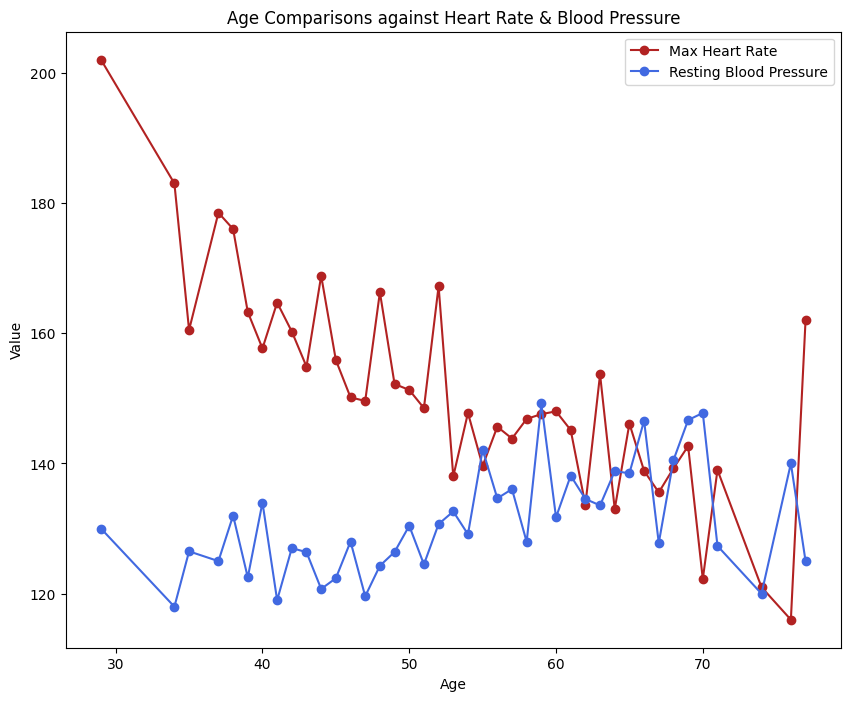

In [ ]:
age_data = sorted(data['age'].unique())
age_thal_data = data.groupby('age')['thalach'].count().values
mthal=[]
for i, age in enumerate(age_data):
    mthal.append(sum(data[data['age'] == age].thalach) / age_thal_data[i])
age_rest_data = data.groupby('age')['trestbps'].count().values
mrest=[]
for i, age in enumerate(age_data):
    mrest.append(sum(data[data['age'] == age].trestbps) / age_rest_data[i])

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(age_data, mthal, 'o-', label='Max Heart Rate', color='firebrick')
ax.plot(age_data, mrest, 'o-', label='Resting Blood Pressure', color='royalblue')
ax.set_xlabel('Age')
ax.set_ylabel('Value')
ax.set_title('Age Comparisons against Heart Rate & Blood Pressure')
ax.legend(loc='best')

plt.show()

#### Cholestrol Levels and Resting Blood Pressure

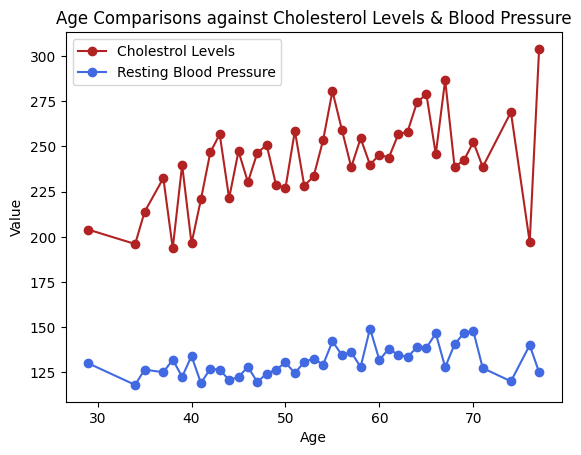

In [ ]:
age_chol_data = data.groupby('age')['chol'].count().values
mchol=[]
for i, age in enumerate(age_data):
  mchol.append(sum(data[data['age'] == age].chol) / age_chol_data[i])

plt.plot(age_data, mchol, color='firebrick', marker='o', label='Cholestrol Levels')
plt.plot(age_data, mrest, color='royalblue', marker='o', label='Resting Blood Pressure')

plt.title('Age Comparisons against Cholesterol Levels & Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.show()

##### Now we move on to our next part - Prediction. 
Predictions help us foresee who is potentially at risk of heart disease. This can be calulated with the following 2 processes - 
"""
* **Feature Engineering** - To enhance our dataset
* **Machine Learning** - To help create a prediction model that acts as our base for all onset patients

## Basic Feature Engineering 

#### Figuring the importance of each feature to our prediction

<Axes: >

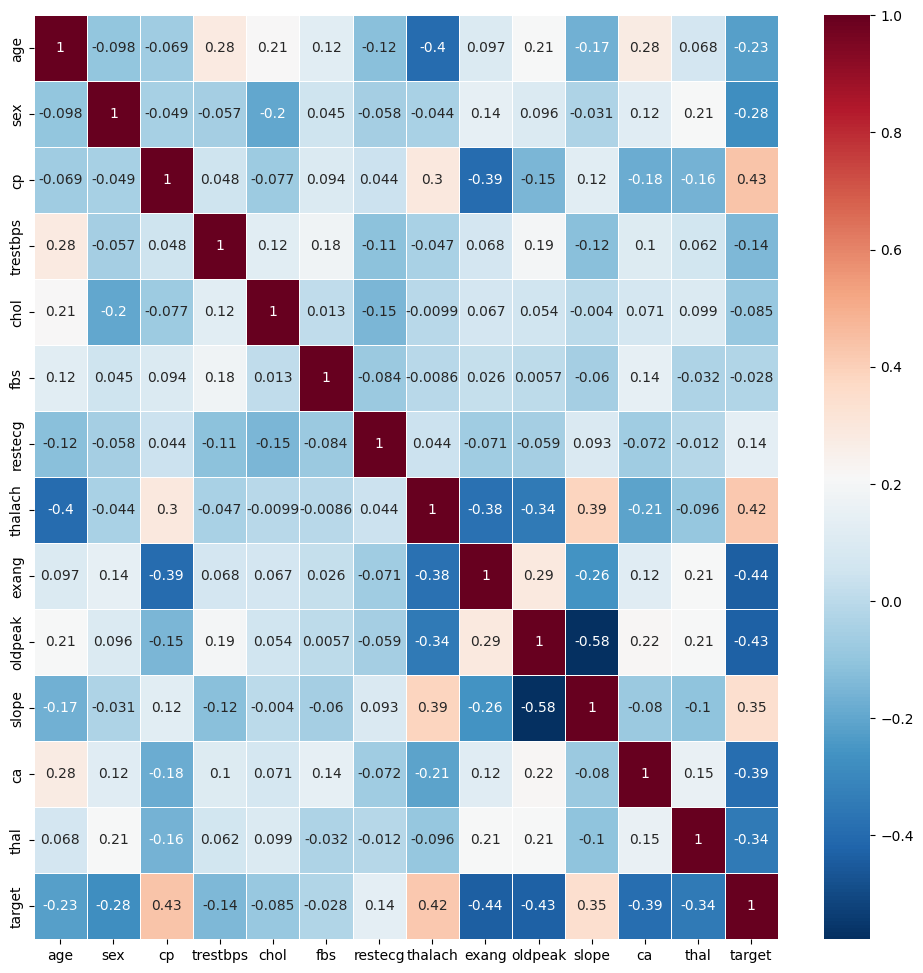

In [ ]:
pearsoncorrelation = data.corr(method='pearson')
plt.figure(figsize = (12,12))
sns.heatmap(pearsoncorrelation, xticklabels=pearsoncorrelation.columns, yticklabels=pearsoncorrelation.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

#### Getting dataset ready for prediction

In [ ]:
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
         'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

## Prediction using Neural Networks

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))
    
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=100, batch_size=10)

In [ ]:
# assuming your neural network is called "model" and your test data is called "X_test" and "Y_test"

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Y_test[:, 1], y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# calculate the confusion matrix
conf_mat = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix:")
print(conf_mat)

# calculate the classification report
class_report = classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Classification Report:")
print(class_report)

# calculate precision, recall, and F1-score
precision = precision_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
recall = recall_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
f1 = f1_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
accuracy = accuracy_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy: ", accuracy)


## Optimising Dataset for Better Predictions

##### Binary Calculations refer to using a two-valued approach instead of multiple values. 
We use this method to see if there are any improvements to our predictions

#### Using Neural Networks - Optimization attempt#01

In [ ]:
Ytr_binary = y_train.copy()
Yt_binary = y_test.copy()

Ytr_binary[Ytr_binary > 0] = 1
Yt_binary[Yt_binary > 0] = 1

Ytr2_binary = Y_train.copy()
Yt2_binary = Y_test.copy()

Ytr2_binary[Ytr2_binary > 0] = 1
Yt2_binary[Yt2_binary > 0] = 1

In [ ]:
model_bin = Sequential()
model_bin.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(2, activation='softmax'))
    
adam_bin = Adam(lr=0.001)
model_bin.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_bin.fit(X_train, Ytr2_binary, validation_data=(X_test, Yt2_binary),epochs=100, batch_size=10)

In [ ]:
#Assuming your neural network is called "model_bin" and your test data is called "X_test"and "Yt2_binary"

# make predictions on the test set
y_pred1 = model_bin.predict(X_test)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Yt2_binary[:, 1], y_pred1[:, 1])
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# calculate the confusion matrix
conf_mat = confusion_matrix(Yt2_binary.argmax(axis=1), y_pred1.argmax(axis=1))
print("Confusion Matrix:")
print(conf_mat)

# calculate the classification report
class_report = classification_report(Yt2_binary.argmax(axis=1), y_pred1.argmax(axis=1))
print("Classification Report:")
print(class_report)

# calculate precision, recall, and F1-score
precision = precision_score(Yt2_binary.argmax(axis=1), y_pred1.argmax(axis=1))
recall = recall_score(Yt2_binary.argmax(axis=1), y_pred1.argmax(axis=1))
f1 = f1_score(Yt2_binary.argmax(axis=1), y_pred1.argmax(axis=1))
accuracy = accuracy_score(Yt2_binary.argmax(axis=1), y_pred1.argmax(axis=1))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy:", accuracy)

#### Using Neural Networks - Optimization attempt#02 changing the activation function from relu to softmax


In [ ]:
Ytr_binary1 = y_train.copy()
Yt_binary1 = y_test.copy()

Ytr_binary1[Ytr_binary1 > 0] = 1
Yt_binary1[Yt_binary1 > 0] = 1

Ytr2_binary1 = Y_train.copy()
Yt2_binary1 = Y_test.copy()

Ytr2_binary1[Ytr2_binary1 > 0] = 1
Yt2_binary1[Yt2_binary1 > 0] = 1

In [ ]:
model_bin = Sequential()
model_bin.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='softmax'))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='softmax'))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(2, activation='softmax'))
    
adam_bin = Adam(lr=0.001)
model_bin.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_bin.fit(X_train, Ytr2_binary1, validation_data=(X_test, Yt2_binary1),epochs=100, batch_size=10)

In [ ]:
#Assuming your neural network is called "model_bin" and your test data is called "X_test"and "Yt2_binary"

# make predictions on the test set
y_pred2 = model_bin.predict(X_test)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Yt2_binary1[:, 1], y_pred2[:, 1])
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# calculate the confusion matrix
conf_mat = confusion_matrix(Yt2_binary.argmax(axis=1), y_pred2.argmax(axis=1))
print("Confusion Matrix:")
print(conf_mat)

# calculate the classification report
class_report = classification_report(Yt2_binary.argmax(axis=1), y_pred2.argmax(axis=1))
print("Classification Report:")
print(class_report)

# calculate precision, recall, and F1-score
precision = precision_score(Yt2_binary.argmax(axis=1), y_pred2.argmax(axis=1))
recall = recall_score(Yt2_binary.argmax(axis=1), y_pred2.argmax(axis=1))
f1 = f1_score(Yt2_binary.argmax(axis=1), y_pred2.argmax(axis=1))
accuracy = accuracy_score(Yt2_binary.argmax(axis=1), y_pred2.argmax(axis=1))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy:", accuracy)

#### Using Neural Networks - Optimization attempt#03 changing the optimizers

In [ ]:
Ytr_binary2 = y_train.copy()
Yt_binary2 = y_test.copy()

Ytr_binary2[Ytr_binary1 > 0] = 1
Yt_binary2[Yt_binary1 > 0] = 1

Ytr2_binary2 = Y_train.copy()
Yt2_binary2 = Y_test.copy()

Ytr2_binary2[Ytr2_binary2 > 0] = 1
Yt2_binary2[Yt2_binary2 > 0] = 1

In [ ]:
model_bin = Sequential()
model_bin.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(2, activation='softmax'))

sgd_bin = SGD(lr=0.001)
model_bin.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

model_bin.fit(X_train, Ytr2_binary2, validation_data=(X_test, Yt2_binary2),epochs=100, batch_size=10)

In [ ]:
#Assuming your neural network is called "model_bin" and your test data is called "X_test"and "Yt2_binary"

# make predictions on the test set
y_pred3 = model_bin.predict(X_test)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Yt2_binary1[:, 1], y_pred3[:, 1])
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# calculate the confusion matrix
conf_mat = confusion_matrix(Yt2_binary2.argmax(axis=1), y_pred3.argmax(axis=1))
print("Confusion Matrix:")
print(conf_mat)

# calculate the classification report
class_report = classification_report(Yt2_binary2.argmax(axis=1), y_pred3.argmax(axis=1))
print("Classification Report:")
print(class_report)

# calculate precision, recall, and F1-score
precision = precision_score(Yt2_binary2.argmax(axis=1), y_pred3.argmax(axis=1))
recall = recall_score(Yt2_binary2.argmax(axis=1), y_pred3.argmax(axis=1))
f1 = f1_score(Yt2_binary2.argmax(axis=1), y_pred3.argmax(axis=1))
accuracy = accuracy_score(Yt2_binary2.argmax(axis=1), y_pred3.argmax(axis=1))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy:", accuracy)

#### Using Neural Networks - Optimization attempt#04 increasing epochs and batchsize and learning rate

In [ ]:
Ytr_binary3 = y_train.copy()
Yt_binary3 = y_test.copy()

Ytr_binary3[Ytr_binary > 0] = 1
Yt_binary3[Yt_binary > 0] = 1

Ytr2_binary3 = Y_train.copy()
Yt2_binary3 = Y_test.copy()

Ytr2_binary3[Ytr2_binary3 > 0] = 1
Yt2_binary3[Yt2_binary3 > 0] = 1

In [ ]:
model_bin = Sequential()
model_bin.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_bin.add(Dropout(0.1))
model_bin.add(Dense(2, activation='softmax'))
    
adam_bin = Adam(lr=0.01)
model_bin.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_bin.fit(X_train, Ytr2_binary3, validation_data=(X_test, Yt2_binary3),epochs=200, batch_size=32)

In [ ]:
#Assuming your neural network is called "model_bin" and your test data is called "X_test"and "Yt2_binary"

# make predictions on the test set
y_pred4 = model_bin.predict(X_test)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Yt2_binary3[:, 1], y_pred4[:, 1])
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# calculate the confusion matrix
conf_mat = confusion_matrix(Yt2_binary3.argmax(axis=1), y_pred4.argmax(axis=1))
print("Confusion Matrix:")
print(conf_mat)

# calculate the classification report
class_report = classification_report(Yt2_binary3.argmax(axis=1), y_pred4.argmax(axis=1))
print("Classification Report:")
print(class_report)

# calculate precision, recall, and F1-score
precision = precision_score(Yt2_binary3.argmax(axis=1), y_pred4.argmax(axis=1))
recall = recall_score(Yt2_binary3.argmax(axis=1), y_pred4.argmax(axis=1))
f1 = f1_score(Yt2_binary3.argmax(axis=1), y_pred4.argmax(axis=1))
accuracy = accuracy_score(Yt2_binary3.argmax(axis=1), y_pred4.argmax(axis=1))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy:", accuracy)

